In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cleanFrame(frame):
    '''
    Function that cleans our dataframe of unnecessary columns and rows with NaN in them.
    Args:
        frame: The frame that will be cleaned.
    Returns: 
        A cleaned frame.
    '''
    newFrame = frame.filter(items = ['Entity', 'Year', 'Life expectancy at birth', 'Real GDP per capita in 2011US$ ($)'])
    newFrame.rename(columns={'Entity': 'Country', 'Life expectancy at birth': 'life_expectancy', 'Real GDP per capita in 2011US$ ($)': 'gdp'}, inplace=True)
    return newFrame.dropna()


def filterYear(frame,year):
    '''
    Function that filters the data frame to contain all countries in a year that have their life expectancy and GDP listed
    Args:
        frame: The data frame that will be filtered. year: The selected year.
    Returns: 
        The filtered data frame.
    '''
    return frame[frame['Year']==str(year)]

df = pd.read_csv('life-expectancy-years-vs-real-gdp-per-capita-2011us.csv') #Find frame
df = cleanFrame(df)  #Clean it
df = filterYear(df,2015)    #Pick entries from the year 2016'

In [2]:
df

,Country,Year,life_expectancy,gdp
215,Afghanistan,2015,63.377,1928.0
305,Africa,2015,61.607,4684.0
558,Albania,2015,78.025,10947.0
778,Algeria,2015,76.090,13024.0
1364,Angola,2015,59.398,8631.0
...,...,...,...,...
48849,Vietnam,2015,75.110,5733.0
49476,World,2015,71.661,14500.0
49725,Yemen,2015,66.085,2496.0
49945,Zambia,2015,61.737,3537.0


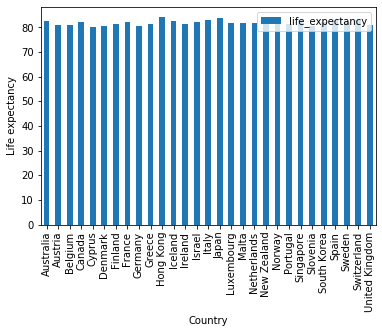

In [3]:
def assignment_1a(df):
    '''
    Function that shows the life expectancy of all countries with their life expectancy one std above the mean
    Args:
        df: dataframe
    '''
    #Pick the life expectancy
    life = df['life_expectancy']
    #Find the mean
    mean = np.mean(life)
    # print(mean)
    std = np.std(life)
    #Filter df to only have countries with high enough 
    df = df[df['life_expectancy'] >= mean+std]
    #Create bar plot
    df.plot.bar(x = 'Country', y = 'life_expectancy')
    plt.ylabel('Life expectancy')
    plt.xlabel('Country')
    plt.show()

assignment_1a(df)

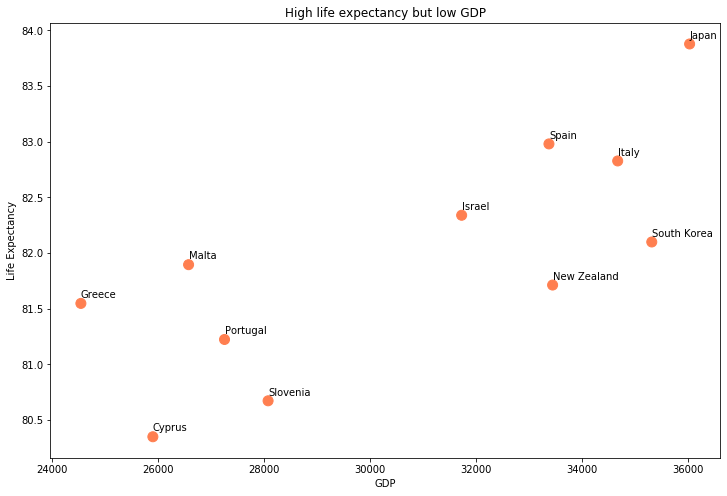

In [4]:
def plot_scatter(x, y, countries, xlabel, ylabel, title, point_size, fig_size, top_size):
    '''
    scatter plot based on xlabel and ylabel, also countries list should be specified to draw the name of country for each        point. Top size has been used to determine at most how many points will be drawn in the scatter plot.
    '''
    plt.figure(figsize=(12, 8))
    point_size = [point_size] * top_size
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.scatter(x[:top_size], y[:top_size], s = point_size, c = 'coral')
    plt.title(title)

    for i in range(top_size):
        plt.text(x[i]-0.05, y[i]+0.05, countries[i])
    plt.show()


def question_1b(df):
    '''
    Function to show which countries` life expectancy is quite high, but has grade per capita which is around mean.
    Args:
        df: dataframe
    '''

    lf_expect_mean = df.life_expectancy.mean()
    lf_expect_std = df.life_expectancy.std()
    gdp_mean = df.gdp.mean()
    gdp_std = df.gdp.std()
    # create new df based on two
    df = df.loc[(df['life_expectancy'] > (lf_expect_mean + lf_expect_std)) & (df['gdp'] < (gdp_mean + gdp_std))]
    plt.rc('ytick',labelsize=10)
    plot_scatter(df['gdp'].values, df['life_expectancy'].values, df['Country'].values, 'GDP', 'Life Expectancy', 'High life expectancy but low GDP', 100, (12, 8), 11)


question_1b(df)
        

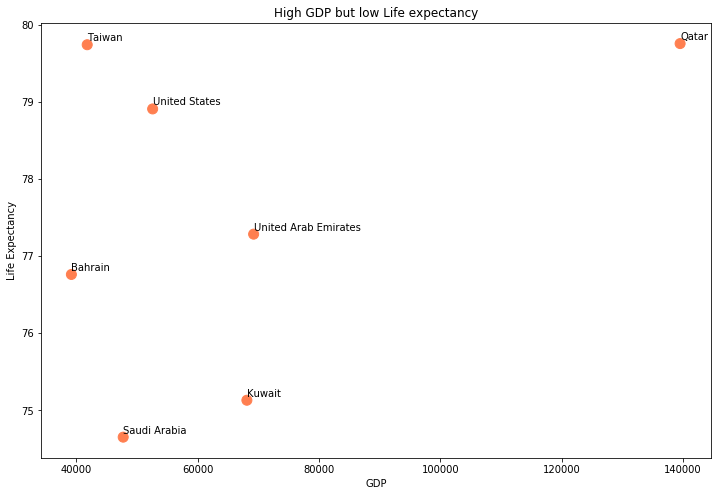

In [5]:
def question_1c(df):
    '''
    Function to show that not all strong economical countries has high life expectancy
    Args:
        df: dataframe
    '''
    lf_expect_mean = df.life_expectancy.mean()
    lf_expect_std = df.life_expectancy.std()
    gdp_mean = df.gdp.mean()
    gdp_std = df.gdp.std()
    # create new df based on two conditions
    df = df.loc[(df['life_expectancy'] < (lf_expect_mean + lf_expect_std)) & (df['gdp'] > (gdp_mean + gdp_std))]
    plt.rc('ytick',labelsize=10)
    plot_scatter(df['gdp'].values, df['life_expectancy'].values, df['Country'].values, 'GDP', 'Life Expectancy', 'High GDP but low Life expectancy', 100, (12, 8), 7)

question_1c(df)

TASK 2

In [6]:
hap_df=pd.read_csv('Happiness-life_satisfaction.csv')
#Clean the frame and filter by year
hap_df.columns=['Entity','Code','Year','Happiness','Life satisfaction','Population']
#rename columns to make more sense and work easily
hap_df.columns.values[0] = "Country"
hap_df.columns.values[3] = "Happiness"
hap_df.columns.values[4] = "Life_satisfaction"
hap_df.columns = hap_df.columns.str.strip()
hap_df = hap_df.filter(items=['Country','Year','Happiness','Life_satisfaction'])
hap_df = hap_df.dropna()
hap = filterYear(hap_df,2014)

#Sort the frame
hap = hap.sort_values('Happiness')

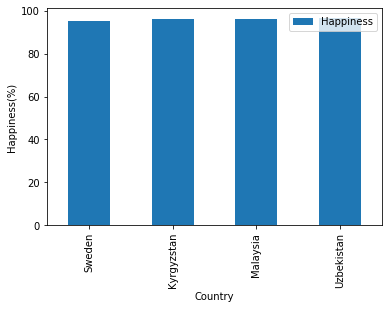

In [7]:
def filterHigh(frame,column,mark):
    '''
    Function to filter everything above a certain value in a column of a data frame
    Args: 
        frame: The data frame that will be filtered. 
        column: The selected column to look at. 
        mark: The point from which the filtering will start
    Returns:
            The filtered data frame.
    '''
    return(frame[frame[column]>= mark])

def assignment_2Happy(df):
    #Find the mean and standard deviation of the happiness
    happy = df['Happiness']
    mean = np.mean(happy)
    std = np.std(happy)
    
    #Plot all countries that have high happiness
    df = filterHigh(df,'Happiness',mean + std)
    df.plot.bar(x = 'Country', y = 'Happiness')
    plt.xlabel('Country')
    plt.ylabel('Happiness(%)')
    plt.show()

assignment_2Happy(hap)


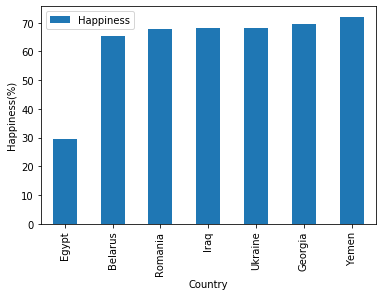

In [8]:
def filterLow(frame,column,mark):
    '''
    Function to filter everything below a certain value in a column of a data frame
    Args:
        frame: The data frame that will be filtered.
        column: The selected column to look at.
        mark: The point from which the filtering will start.
    Returns: The filtered data frame.
    '''

    return(frame[frame[column]<= mark])

def assignment_2NotHappy(df):
    #Find the mean and standard deviation of the happiness
    happy = df['Happiness']
    mean = np.mean(happy)
    std = np.std(happy)
    
    #Plot all countries that have low happiness
    df = filterLow(df,'Happiness',mean - std)
    df.plot.bar(x = 'Country', y = 'Happiness')
    plt.xlabel('Country')
    plt.ylabel('Happiness(%)')
    plt.show()

assignment_2NotHappy(hap)


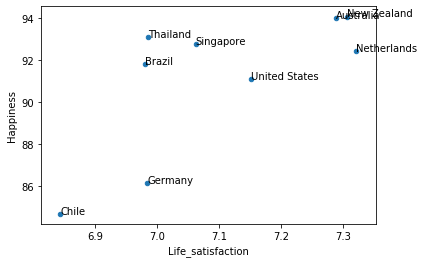

In [9]:
def assignment_2SatisfiedMeansHappy(df):
    '''
    See if countries with high satisfaction also has high happiness
    Args:
        df: dataframe
    '''
    #Find the mean and standard deviation of the happiness and satisfaction
    satisMean = np.mean(df['Life_satisfaction'])
    satisStd = np.std(df['Life_satisfaction'])
    happyMean = np.mean(df['Happiness'])
    happyStd = np.std(df['Happiness'])
    #Filter out the data
    df=filterHigh(df,'Life_satisfaction',satisMean+satisStd)
    df=filterLow(df,'Happiness',happyMean+happyStd)
    df.plot.scatter(x='Life_satisfaction',y='Happiness')
    #Annotate the data
    for i, row in df.iterrows():
        plt.annotate(row['Country'],(row['Life_satisfaction'],row['Happiness']))
    plt.show()
    
assignment_2SatisfiedMeansHappy(hap)

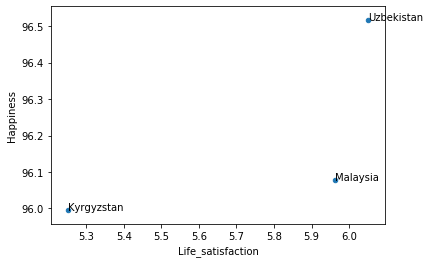

In [10]:

def assignment_2HappyMeansSatisfied(df):
    '''
    function helps to find countries whose life satisfaction is in between mean and average, happiness is above std from         mean.
    Args:
        df: dataframe
    '''
    
    #Find the mean and standard deviation of the happiness and satisfaction
    satisMean = np.mean(df['Life_satisfaction'])
    satisStd = np.std(df['Life_satisfaction'])
    happyMean = np.mean(df['Happiness'])
    happyStd = np.std(df['Happiness'])
    #Filter out the data
    df=filterLow(df,'Life_satisfaction',satisMean + satisStd)
    df=filterHigh(df,'Happiness',happyMean+happyStd)
    df.plot.scatter(x='Life_satisfaction',y='Happiness')
     #Annotate the data
    for i, row in df.iterrows():
        plt.annotate(row['Country'],(row['Life_satisfaction'],row['Happiness']))
    plt.show()

assignment_2HappyMeansSatisfied(hap)

In [11]:
df_2009 = filterYear(hap_df,2009)
df_2014 = filterYear(hap_df,2014)
#sorting values according Life satisfaction in descending order for both years
df_2009 = df_2009.sort_values('Life_satisfaction', ascending=False) 
df_2014 = df_2014.sort_values('Life_satisfaction', ascending=False)

# # plt.scatter(df_2009['Happiness'], df_2009['Life_satisfaction'])
# plot_scatter(df_2009['Happiness'].values, df_2009['Life_satisfaction'].values, df_2009['Country'].values, 'Happiness', 'Life satisfaction', '', 200, (12, 8), 44)
# plt.boxplot(df_2009['Happiness'])

In [12]:
# merge two data based on intersection of Countries in both year
intersected_data = pd.merge(df_2009[:10], df_2014[:10], how='inner', on=['Country'])
intersected_data

,Country,Year_x,Happiness_x,Life_satisfaction_x,Year_y,Happiness_y,Life_satisfaction_y
0,Sweden,2009,96.103897,7.265977,2014,95.261848,7.239148
1,United States,2009,92.868591,7.158032,2014,91.081085,7.151114
2,Brazil,2009,90.380768,7.000832,2014,91.784515,6.980999
3,Germany,2009,78.248177,6.641493,2014,86.134247,6.984214
4,Chile,2009,82.082077,6.493686,2014,84.669342,6.844238


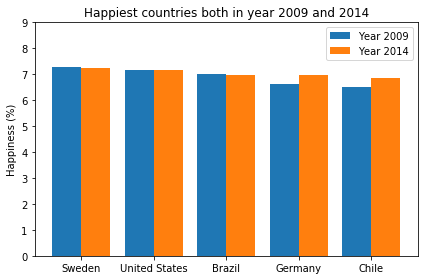

In [13]:
def bar_plot(intersected_data, auto_label=False):
    '''
    Function helps to plot multiple bars in one plot
    Args:
        intersected_data: merged data frame
    '''
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 3)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig, ax = plt.subplots()
    width = 0.4
    x = np.arange(len(intersected_data['Country']))  # the label locations
    rects1 = ax.bar(x-width/2, intersected_data['Life_satisfaction_x'], width, label='Year 2009')
    rects2 = ax.bar(x+width/2, intersected_data['Life_satisfaction_y'], width, label='Year 2014')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylim([0, 9])
    ax.set_ylabel('Happiness (%)')
    ax.set_title('Happiest countries both in year 2009 and 2014')
    ax.set_xticks(x)
    ax.set_xticklabels(intersected_data['Country'])

    if auto_label == True:
        autolabel(rects1)
        autolabel(rects2)
    fig.tight_layout()
    ax.legend()


bar_plot(intersected_data)

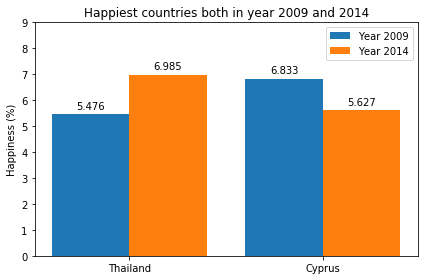

In [14]:
def dramatic_changes(df1, df2):
    '''
    check which countries are in top 10 according to 2009 but lower than average according to 2014 and visa verca
    Args:
        df1: 1st dataframe
        df2: 2nd dataframe
    Returns:
        df: concatenated data after comparing two year
    '''
    df1 = df1.sort_values('Life_satisfaction', ascending=False)
    df2 = df2.sort_values('Life_satisfaction', ascending=False)
    mean = df1['Life_satisfaction'].mean()
    std = df2['Life_satisfaction'].std()

    
    increased_life_satisfaction = pd.merge(df1.loc[(df1['Life_satisfaction'] < mean)], df2.loc[(df2                ['Life_satisfaction'] > mean + std )], how='inner', on=['Country'])

    decreased_life_satisfaction = pd.merge(df1.loc[(df1['Life_satisfaction'] > mean + std)], df2.loc[(df2['Life_satisfaction'] < mean)], how='inner', on=['Country'])

    df = pd.concat([increased_life_satisfaction, decreased_life_satisfaction])
    return df

df = dramatic_changes(df_2009, df_2014)
bar_plot(df, True)